In [2]:
import sys
sys.path.append('../src')

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data.load_data import load_data_from_csv
from utils import get_predictions
from trade.trading_strategy import moving_average_strategy
from trade.backtest import simulate_trades_with_allocation
from utils import daily_sharpe_ratio, plot_dynamic_sharpe_ratio, plot_daily_returns, plot_cumulative_returns_baseline

#
tickers = ['GOOGL', 'AMZN', 'AAPL', 'PEP', 'JNJ', 'PFE', 'MRK', 'ABBV', 'PG', 'KO',
           'WMT', 'JPM', 'BAC', 'GS', 'V', 'XOM', 'CVX', 'COP', 'BP', 'BA',
           'MMM', 'HON', 'GE', 'T', 'VZ', 'TMUS', 'HSY', 'DUK', 'SO', 'EXC', 'AEP',
           'AMT', 'PLD', 'SPG', 'BHP', 'RIO', 'VALE', 'FCX']
start_date = '2010-01-01'
end_date = '2023-10-23'
sequence_length = 50

In [3]:
# Load models and get predictions
predictions, actuals = get_predictions(tickers, start_date, end_date, sequence_length, folder_path='models')

# Trading strategy
trading_signals = moving_average_strategy(predictions)

# Backtest the strategy
portfolio_returns = simulate_trades_with_allocation(predictions, actuals, trading_signals, initial_capital=100000, allocation_percentage=0.1, slippage_rate=0.02, transaction_cost=0.005)

# Evaluate performance
sharpe_ratio = daily_sharpe_ratio(portfolio_returns)
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")


Processing GOOGL...


2024-08-04 22:25:07.637696: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-04 22:25:07.639283: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


22/22 [==============================] - 2s 38ms/step
Processing AMZN...
22/22 [==============================] - 1s 42ms/step
Processing AAPL...
22/22 [==============================] - 1s 41ms/step
Processing PEP...
22/22 [==============================] - 1s 40ms/step
Processing JNJ...
22/22 [==============================] - 1s 43ms/step
Processing PFE...
22/22 [==============================] - 1s 38ms/step
Processing MRK...
22/22 [==============================] - 1s 39ms/step
Processing ABBV...
17/17 [==============================] - 1s 46ms/step
Processing PG...
22/22 [==============================] - 2s 44ms/step
Processing KO...
22/22 [==============================] - 1s 39ms/step
Processing WMT...
22/22 [==============================] - 1s 40ms/step
Processing JPM...
22/22 [==============================] - 1s 38ms/step
Processing BAC...
22/22 [==============================] - 1s 37ms/step
Processing GS...
22/22 [==============================] - 2s 49ms/step
Processing

/home/radvije/PythonProjects/ats-sf/notebooks/utils.py:92: RuntimeWarning: divide by zero encountered in double_scalars
  return np.mean(excess_returns) / np.std(excess_returns) * np.sqrt(trading_days)


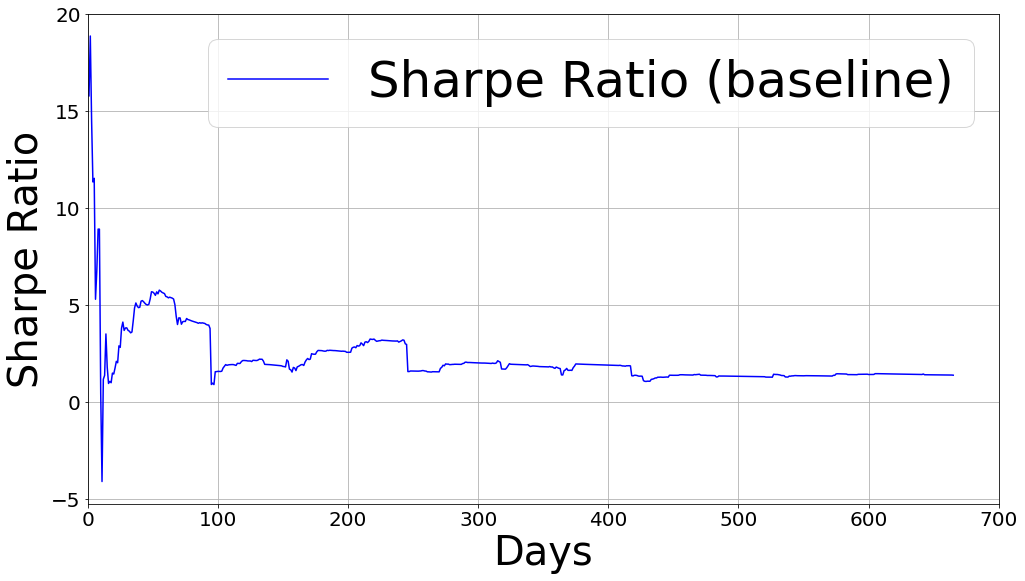

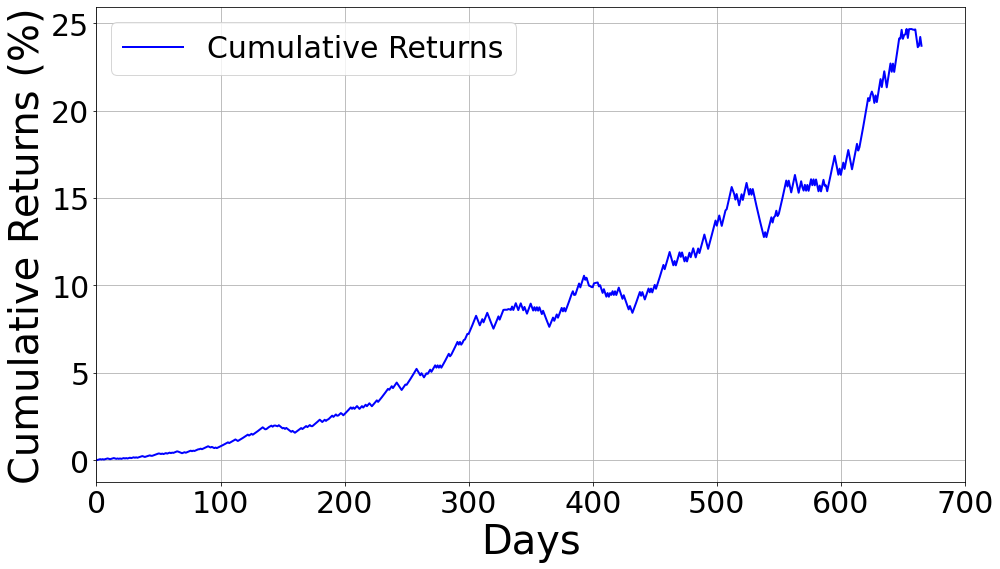

In [4]:
os.makedirs('plots/baseline', exist_ok=True)

plot_dynamic_sharpe_ratio(portfolio_returns)


plot_cumulative_returns_baseline(portfolio_returns)